In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("data/diabetes-1.csv")
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
a = np.array([1,2,3,4])
b = np.array([True,False,False,True])
a[b]


array([1, 4])

In [5]:
a = np.array([1,2,3,4])
b =a<=2
a[b]

array([1, 2])

In [6]:
bp_na_recs = df['BloodPressure'].isna()
bp_na_recs

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: BloodPressure, Length: 768, dtype: bool

In [7]:
df[bp_na_recs] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
12,10,139,NaN,0,0,27.1,1.441,57,0


In [8]:
df[(df['BloodPressure']<100) & (df['Age']<=30)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
5,5,116,74.0,0,0,25.6,0.201,30,0
6,3,78,50.0,32,88,31.0,0.248,26,1
7,10,115,0.0,0,0,35.3,0.134,29,0
10,4,110,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
758,1,106,76.0,0,0,37.5,0.197,26,0
760,2,88,58.0,26,16,28.4,0.766,22,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0


In [9]:
df = df.sort_values('Age').reset_index(drop=True)

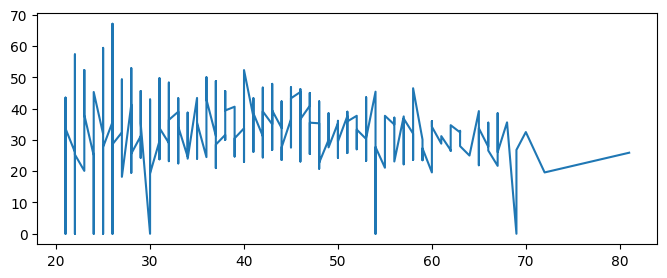

In [10]:
plt.figure(figsize=(8,3))
plt.plot(df['Age'], df['BMI'])

In [11]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,114,66.0,36,200,38.1,0.289,21,0
1,1,80,55.0,0,0,19.1,0.258,21,0
2,2,117,90.0,19,71,25.2,0.313,21,0
3,1,97,64.0,19,82,18.2,0.299,21,0
4,3,87,60.0,18,0,21.8,0.444,21,0


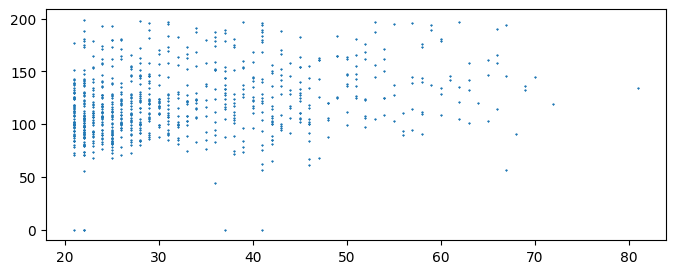

In [12]:
plt.figure(figsize=(8,3))
plt.plot(df['Age'], df['Glucose'], '*',ms=1)

In [13]:
! pip install seaborn

<Axes: >

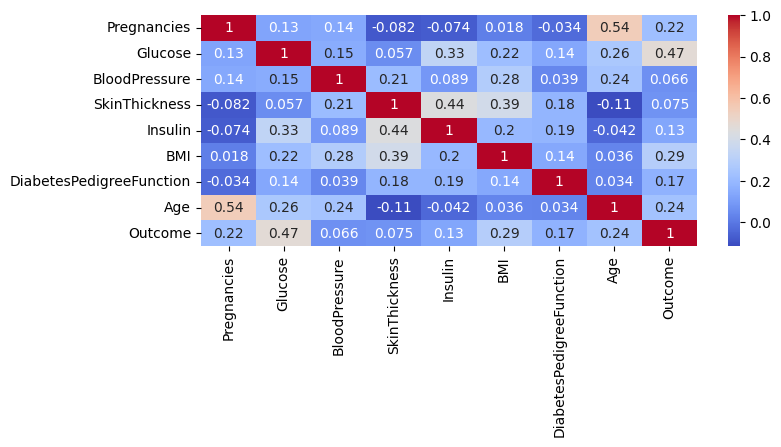

In [14]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
df = df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'],axis=1)
df.head(5)

,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,38.1,0.289,21,0
1,0,19.1,0.258,21,0
2,71,25.2,0.313,21,0
3,82,18.2,0.299,21,0
4,0,21.8,0.444,21,0


In [17]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size= 0.2, random_state=42
)

In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
accuracy_score(y_test, y_pred)

0.6948051948051948

In [23]:
print(f"{accuracy_score(y_test, y_pred) = }")
print(f"{recall_score(y_test, y_pred) = }")
print(f"{f1_score(y_test, y_pred) = }")
print(f"{precision_score(y_test, y_pred) = }")

accuracy_score(y_test, y_pred) = 0.6948051948051948
recall_score(y_test, y_pred) = 0.39215686274509803
f1_score(y_test, y_pred) = 0.45977011494252873
precision_score(y_test, y_pred) = 0.5555555555555556
